## Linear regression

Use 2 in Cost function

In [9]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def linear_regression():
    # Step # 1 - Extract data and prepare data
    points = np.genfromtxt('data.csv', delimiter = ',')
    
    mean = points.mean(axis = 0)
    std = points.std(axis = 0)
    
    points = (points - mean) / std
    
    # Step # 2 - Define hyperparameters
    
    ## Learning rate
    learning_rate = 0.001
    
    ## Coefficients y = theta.T * X
    
    init_theta = np.zeros(points.shape[1]).reshape(points.shape[1], 1)
    
    ## epsilon
    eps = 0.0001
    
    # Step 3 - model training
    
    print(
        'Start learning at:\ntheta =\n{0}\nerror = {1}'.format(
            init_theta,
            compute_error(init_theta, points)[0][0]
        )
    )
    
    theta = gradient_descent(init_theta, points, learning_rate, eps)
    
    print(
        'End learning at:\ntheta =\n{0}\nerror = {1}'.format(
            theta,
            compute_error(theta, points)[0][0]
        )
    )
    
    return theta


def compute_error(theta, points):
    '''
        Computes Error = 1/2N * (X*theta - y).T * (X*theta - y)
    '''
    
    error = 0
    N = len(points)
    X = np.hstack((np.ones((N, 1)), points[:, 0].reshape(N, 1)))
    y = points[:, 1].reshape(N, 1)
    
    diff = X.dot(theta) - y
    error = np.dot(diff.T, diff)
        
    return error / (2 * N)
    
def gradient_descent(starting_theta, points, learning_rate, eps):
    '''
        Performs gradient step while gradient step is > eps
        in order to find optimal theta
    '''
    iterations = 0
    theta = starting_theta
    
    while True:
        grad = gradient_step(starting_theta, points, eps)
        theta -= grad
        iterations += 1
        if np.all(np.absolute(grad / learning_rate) < eps):
            print('Number of iterations: {}'.format(iterations))
            break

    return theta
    

def gradient_step(current_theta, points, learning_rate):
    '''
        Updates theta in antigradient direction
        with given learning_rate
    '''
    N = len(points)
    X = np.hstack((np.ones((N, 1)), points[:, 0].reshape(N, 1)))
    y = points[:, 1].reshape(N, 1)
    theta = current_theta
    diff = np.dot(X, theta) - y
    
    grad = np.dot(X.T, diff)
    
    return learning_rate * grad / N

In [11]:
theta = linear_regression()

Start learning at:
theta =
[[ 0.]
 [ 0.]]
error = 0.5
Number of iterations: 66510
End learning at:
theta =
[[  2.78246931e-15]
 [  7.72728611e-01]]
error = 0.20067260411914595


## Plot Cost funstion

In [20]:
#def plot_decorator(f):
#    points = np.genfromtxt('data.csv', delimiter=',')
    
#    return lambda theta: f(theta, points)


#cost = plot_decorator(compute_error)

In [73]:
#A = np.linspace(-10, 12, 40)
#B = np.linspace(-10, 12, 40)

#A, B = np.meshgrid(A, B)
#E = cost(A, B)

ValueError: shapes (100,2) and (2,40,40) not aligned: 2 (dim 1) != 40 (dim 1)

TypeError: Input z must be at least a 2x2 array.

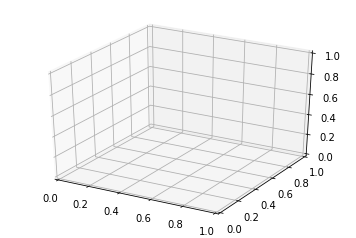

In [24]:
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.contour3D(A, B, E, 1000)
#ax.set_xlabel('a')
#ax.set_ylabel('b')
#ax.set_zlabel('cost')



## Plot data and learned function

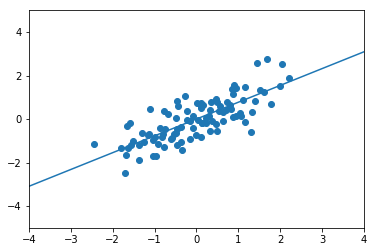

In [27]:
points = np.genfromtxt('data.csv', delimiter = ',')

mean = points.mean(axis = 0)
std = points.std(axis = 0)
    
points = (points - mean) / std

X = points[:, 0]
Y = points[:, 1]

plt.xlim(-4, 4)
plt.ylim(-5, 5)
plt.scatter(X, Y)

params = np.linspace(-10, 50, 10)
params_ones = np.vstack((np.ones((1, 10)), params.reshape(1, 10)))

lin_regression = np.dot(theta.T, params_ones)

plt.plot(params, theta[0] + theta[1] * params)

plt.show()
